# ÁRVORE GERADORA MÍNIMA

O Problema da Árvore Geradora Mínima (_Minimal Spanning Tree_), abreviado como AGM ou MST, consiste em encontrar dentro de um grafo $G(v,a)$ um subgrafo $A(v,a) \in G(v,a)$ que possua o menor custo, em que $A$ é um grafo do tipo árvore que contém todos os vértices $v \in G$ mas não necessariamente contém todos as arestas $a \in G$

Encontrar a AGM pode ser interessante nos casos em que desejamos diminuir o custo de um sistema que pode ser representado por um grafo. Um bom exemplo seria o de encontrar dentro de uma rede de instalações elétricas o subconjunto de fios que necessitará menos recursos para a sua instalação inicial. Ou então selecionar dentre as várias rotas de aviação que interligam um conjunto de aeroportos as rotas que interligam todos os aeroportos que possuem o menor custo de transporte. Os algoritmos mais utilizados para encontrar a AGM são os de [Kruskal](https://pt.wikipedia.org/wiki/Algoritmo_de_Kruskal#:~:text=O%20algoritmo%20de%20Kruskal%20%C3%A9,arestas%20da%20%C3%A1rvore%2C%20%C3%A9%20minimizado.) e de [Prim](https://pt.wikipedia.org/wiki/Algoritmo_de_Prim).

O problema da AGM será o único problema ensinado na disciplina de POII que não pode ser modelo em um Problema de Programação Linear (além dos problemas de Programação Não-Linear, obviamente). Nas aulas a seguir, será mostrado como os demais problemas podem ser resolvidos usando a biblioteca Pyomo do Python. Por hora, será mostrado como resolver esse problema utilizando as Classes do Python e utilizando a biblioteca Networkx.

# Instância do Problema

O governo italiano contratou uma empresa de telecomunicações com o intuito de instalar uma rede óptica entre várias cidades. Um mapa das possíveis instalações de rede se encontra na figura a seguir, onde os nós (vértices) representam as 21 cidades das quais se deseja conectá-las por fibras ópticas entre si e as arestas contém as distâncias entre as cidades. Deseja-se descobrir dentro das possíveis conexões mostradas na figura, quais as instalações que devem ser feitas que permitem conectar todas as cidades pelo menor custo possível.

<center>

![rede_eletrica.png](assets/grafo_rede_eletrica.png.png)

|Nó |Cidade   |
|:-:|:-------:|
|  1|Torino   |
|  2|Milano   |
|  3|Bolzano  |
|  4|Verona   |
|  5|Venezia  |
|  6|Trieste  |
|  7|Genova   |
|  8|Bolgano  |
|  9|Ancona   |
| 10|Pisa     |
| 11|Firenze  |
| 12|Roma     |
| 13|Peragia  |
| 14|Caligiari|
| 15|Napoli   |
| 16|Pesacara |
| 17|Palermo  |
| 18|Catamin  |
| 19|Potenza  |
| 20|Catanzaro|
| 21|Bari     |

Fonte: Sakiyami et al. (2002)

</center>

# Resolvendo com classes em Python

As principais bibliotecas que tratam de Grafos em Python utilizam o conceito de OOP (_Object Oriented Programming_). Em termos práticos, a programação é estruturada com base na criação de classes e métodos. Objetos são criados com base nas classes disponíveis.

Segue algumas fontes interessantes para o estudo da Programação Orientada a Objetos:

- Vídeo: [Object Oriented Programming with Python - Full Course for Beginners](https://www.youtube.com/watch?v=Ej_02ICOIgs)
- Playlist: [Python OOP Tutorials - Working with Classes](https://www.youtube.com/playlist?list=PL-osiE80TeTsqhIuOqKhwlXsIBIdSeYtc)
- Playlist: [Curso de POO Teoria (Curso em Video)](https://www.youtube.com/playlist?list=PL6qsRzBhn4BlSiDHoGWLj6Op4Ika8zjIC)

## Criando as classes

Aqui exemplifico a criação de uma simples classe Grafo. Dentre outros motivos, isso é interessante porque diferentes grafos apresentam atributos similares (número de vértices, número de arestas, etc.) que podem, assim, ser agrupados em uma estrutura única e organizada a partir de uma classe.

Abaixo temos um exemplo de criação de duas classes: Vertice e Grafo. E os atributos estabelecidos para a criação de um grafo nesse exemplo foram:

In [ ]:
class Vertice:  

  def __init__(self, rotulo, custo=0.0, antecessor=""):

    """ 
    Essa é a função construtura, que é usada para construir novas
    instâncias de um objeto, neste caso o objeto de Vértice.
    """

    # Validações dos argumentos:
    assert isinstance(rotulo, str), 'Rótulo do vértice deve ser um texto.'
    assert rotulo != "", 'Rótulo não pode ser um texto vazio.'
    assert isinstance(custo, float) or isinstance(custo, int), 'O custo do vértice deve ser um número.'
    assert isinstance(antecessor, str) or antecessor == None, 'O antecessor deve ser um texto.'

    # Atribui os valores dos argumentos nas propriedades:
    self.rotulo = rotulo
    self.custo = custo
    self.antecessor = antecessor
    self.visitado = False

  def __repr__(self): # Função que retorna a forma como o objeto será representado quando chamado
    return f"'{self.rotulo}': {self.custo}"

  def add_visita(self):
    self.__visitado = True

  def limpa_visita(self):
    self.__visitado = False

  def busca_igual (self, r: str):
    return r == self.rotulo

class Aresta:
  
  """
  VISIBILIDADE: public(público), private(privado) e restrito(restricted)

  Ao contrário das outras linguagens de programação, a linguagem Python não possui
  as palavras reservadas 'public', 'private' e 'restricted', que são usadas para definir
  a visibilidade dos atributos e métodos de um objeto. Para driblar isso, foi convencionado
  que para um atributo ou método ser considerado privado, adiciona-se dois sublinhados antes
  do nome do atributo ou método: __<atributo ou método>
  """

  def __init__(self, inicio: str, fim: str, custo=0.0):
    assert isinstance(custo, float) or isinstance(custo, int), 'Custo da aresta deve ser um número.'
    self.__inicio = inicio
    self.__fim = fim
    self.__custo = custo

  def __repr__(self):
    return f"Aresta {self.__inicio}-{self.__fim}\nCusto: {self.__custo}\n"

  # GETTERS
  @property
  def inicio(self) -> str:
    return self.__inicio
  
  @property
  def fim(self) -> str:
    return self.__fim

  @property
  def custo(self) -> float:
    return self.__custo

  # SETTERS
  @inicio.setter
  def set_inicio(self, inicio: str):
    self.__inicio = str(inicio)

  @fim.setter
  def set_fim(self, fim: str):
    self.__fim = str(fim)
  
  @custo.setter
  def set_custo(self, custo: float):
    self.__custo = float(custo)

class Grafo:
  all = [] # Lista que armazenará todos os grafos já instanciados.

  def __init__(self, nome="Grafo " + str(len(all) + 1)):

    # Validações dos argumentos:
    assert isinstance(nome, str), 'Nome do grafo deve ser um texto.'
    assert nome != "", 'O nome do grafo não pode ser um texto vazio.'
    
    # Definindo os atributos do Grafo:
    self.__nome = nome        # nome do grafo
    self.__ordem = 0          # número de vértices no grafo
    self.__vertices = [] # lista de vértices
    self.__arestas = []       # lista de arestas
    self.__Adj_matrix = []    # matriz de adjacência
    
    # Adiciona o vértice instanciado na lista 'all'.
    Grafo.all.append(self)
  
  @property
  def nome(self):
    return self.__nome
  
  @nome.setter
  def set_nome(self, nome: str):
    assert nome != "", 'O nome do grafo não pode ser um texto vazio.'
    self.__nome = nome

  @property
  def vertices(self):
    return self.__vertices
  
  @property
  def arestas(self):
    return self.__arestas
  
  @property
  def ordem(self):
    return self.__ordem

  @property
  def Adj_matrix(self):
    return self.__Adj_matrix
  
  def __repr__(self): # Função que retorna a forma como o objeto será representado quando chamado.

    # Identifincado qual o maior número de caracteres dentre os rótulos dos vértices
    tam_max_char = 0

    for vertice in self.__vertices:
      if len(vertice.rotulo) > tam_max_char:
        tam_max_char = len(vertice.rotulo)

    # Construindo o cabeçalho da matriz de adjacência
    cabecalho = " " * (tam_max_char + 2)

    for i in range(len(self.__vertices)):
      cabecalho += " " + self.__vertices[i].rotulo + " "*(tam_max_char - len(self.__vertices[i].rotulo) + 1)

    cabecalho += "\n\t"

    # Construindo o corpo da matriz de adjacência
    matriz = cabecalho
    for i in range(len(self.__vertices)):
      linha = "["
      for adj in self.__Adj_matrix[i]:
        linha += str(adj) + " "*(tam_max_char - 1) + ", "
      linha = linha[:-2] + "]\n\t"

      matriz += " "*(tam_max_char - len(self.__vertices[i].rotulo) + 1) + self.__vertices[i].rotulo + " " + linha

    return f"{self.__nome}:\n\tOrdem: {self.__ordem},\n\tVértices: {self.__vertices},\n\tMatriz de Adjacências:\n\t{matriz}"
    
  def add_vertice(self, rotulo: str, custo= float('inf'), antecessor="null"):
    self.__ordem += 1
    self.__vertices.append(Vertice(rotulo, custo, antecessor))

    for linha in self.__Adj_matrix:
      linha.append(0)
    
    self.__Adj_matrix.append([0]*len(self.__vertices))

  def add_aresta (self, vertice_inicial: str, vertice_final: str, custo: float):

    i_inicial = -1 # índice do vértice inicial
    i_final = -1   # índice do vértice final

    for i in range(len(self.__vertices)):

      if self.__vertices[i].rotulo == vertice_inicial:
        i_inicial = i
  
      if self.__vertices[i].rotulo == vertice_final:
        i_final = i
      
    if i_inicial == -1:
      return f"Vértice {vertice_inicial} não existe em {self.__nome}! Adicione o vértice antes de adicionar a aresta."
    elif i_final == -1:
      return f"Vértice {vertice_final} não existe em {self.__nome}! Adicione o vértice antes de adicionar a aresta."
    
    # Neste caso, estamos considerando que o Grafo é não orientado.
    self.__Adj_matrix[i_inicial][i_final] = 1
    self.__Adj_matrix[i_final][i_inicial] = 1
    self.__arestas.append(Aresta(vertice_inicial, vertice_final, custo))
    self.__arestas.append(Aresta(vertice_final, vertice_inicial, custo))

  def aresta(self, inicio: str, fim: str):
    for aresta in self.__arestas:
      if aresta.inicio == inicio and aresta.fim == fim:
        return aresta
    #print('Aresta não encontrada!')
    #return None

  def vertice (self, nome: str):
    for i in range(len(self.__vertices)):
      vertice = self.__vertices[i]
      if vertice.rotulo==nome:
        return vertice
    #print(f'Vertice {nome} não encontrado no grafo {self.__nome}.')
    #return None
  
  def grau_vertice(self, vertice: str):
    i_vertice = -1 # índice do vértice

    for i in range(len(self.__vertices)):
      if self.__vertices[i].rotulo == vertice:
        i_vertice = i

    if i_vertice == -1:
      return f"Vértice {vertice} não existe em {self.__nome}."
    else:
      return self.__Adj_matrix[i_vertice].count(1)
  
  def adjacentes(self, vertice: str) -> set: # Retorna um conjunto de adjacentes de um dado vertice

    # Verificando se o vértice se encontra no grafo
    v = None
    i_v = -1 # Índice do vértice
    for i in range(len(self.__vertices)):
      if self.__vertices[i].rotulo == vertice:
        v = self.__vertices[i]
        i_v = i

    indices = []
    for j in range(len(self.__Adj_matrix[i_v])):
      if self.__Adj_matrix[i_v][j] == 1:
        indices.append(j)
      
    Adj = set() # Conjunto dos vértices adjacentes
    for i in range(len(self.__vertices)):
      for j in range(len(indices)):
        if i == indices[j]:
          Adj.add(self.__vertices[i])

    return Adj

  def prim(self): # Algoritmo usado para encontrar a Árvore Geradora Mínima

    visitados = set() # conjunto dos vértices visitados
    v_atual = self.__vertices[0] # vértice atual a ser analisado na iteração atual
    v_atual.custo = 0.0
    i = 0

    while len(visitados) < len(self.__vertices):

      visitados.add(v_atual)
      candidatos = self.adjacentes(
          v_atual.rotulo) - visitados.intersection(self.adjacentes(v_atual.rotulo)
          )
      i += 1

      print("-----------------------------------------------------------------------------------------------------")
      print(f"ITERAÇÃO {i}")
      print(f"Vertice atual: {v_atual}")
      
      for vertice in candidatos:
        arco = self.aresta(v_atual.rotulo, vertice.rotulo)
        if arco.custo < vertice.custo:
          vertice.custo = arco.custo
          vertice.antecessor = v_atual.rotulo

      print(f"Vertice Antecedente Custo Visitado")
      for vertice in self.__vertices:
        print(f"{vertice.rotulo.ljust(7)} {vertice.antecessor.ljust(11)} {vertice.custo:5.1f} {str(vertice in visitados).rjust(8)}")
      print("\n")

      nao_visitados = set(self.__vertices)-visitados # Conjunto dos vértices não visitados
      menor_custo = float('inf') # Define o menor custo como infinito
      for vertice in nao_visitados:
        if vertice.custo < menor_custo:
          menor_custo = vertice.custo
          v_atual = vertice
  
    # Criando a Árvore Geradora Mínima
    print("-----------------------------------------------------------------------------------------------------")
    AGM = Grafo("AGM - " + self.__nome)
    for vertice in visitados:
      AGM.add_vertice(vertice.rotulo, vertice.custo, vertice.antecessor) 
    for vertice in AGM.vertices:
      AGM.add_aresta(vertice.antecessor, vertice.rotulo, vertice.custo)
            
    return AGM

## Resolvendo o problema

In [ ]:
rede = Grafo()
rede.add_vertice("1")
rede.add_vertice("2")
rede.add_vertice("3")
rede.add_vertice("4")
rede.add_vertice("5")
rede.add_vertice("6")
rede.add_vertice("7")
rede.add_vertice("8")
rede.add_vertice("9")
rede.add_vertice("10")
rede.add_vertice("11")
rede.add_vertice("12")
rede.add_vertice("13")
rede.add_vertice("14")
rede.add_vertice("15")
rede.add_vertice("16")
rede.add_vertice("17")
rede.add_vertice("18")
rede.add_vertice("19")
rede.add_vertice("20")
rede.add_vertice("21")
rede.add_aresta( "1",  "2",  95)
rede.add_aresta( "1",  "7",  90)
rede.add_aresta( "2",  "3", 140)
rede.add_aresta( "2",  "4", 110)
rede.add_aresta( "2",  "7",  90)
rede.add_aresta( "3",  "4", 110)
rede.add_aresta( "3",  "6", 210)
rede.add_aresta( "4",  "5",  90)
rede.add_aresta( "4",  "8",  95)
rede.add_aresta( "5",  "6",  85)
rede.add_aresta( "5",  "8",  95)
rede.add_aresta( "7",  "8", 130)
rede.add_aresta( "7", "10", 120)
rede.add_aresta( "7", "11", 150)
rede.add_aresta( "8",  "9", 200)
rede.add_aresta( "8", "11",  55)
rede.add_aresta( "9", "16", 130)
rede.add_aresta("10", "11",  60)
rede.add_aresta("10", "12", 190)
rede.add_aresta("11", "12", 180)
rede.add_aresta("11", "13", 110)
rede.add_aresta("12", "13", 120)
rede.add_aresta("12", "14", 480)
rede.add_aresta("12", "15", 180)
rede.add_aresta("13", "16", 170)
rede.add_aresta("14", "17", 420)
rede.add_aresta("15", "16", 200)
rede.add_aresta("15", "17", 310)
rede.add_aresta("15", "18", 350)
rede.add_aresta("15", "19",  90)
rede.add_aresta("15", "21", 210)
rede.add_aresta("16", "21", 270)
rede.add_aresta("17", "18", 150)
rede.add_aresta("18", "20", 210)
rede.add_aresta("19", "20", 200)
rede.add_aresta("19", "21", 100)
AGM = rede.prim()
print(AGM)

-----------------------------------------------------------------------------------------------------
ITERAÇÃO 1
Vertice atual: '1': 0.0
Vertice Antecedente Custo Visitado
1       null          0.0     True
2       1            95.0    False
3       null          inf    False
4       null          inf    False
5       null          inf    False
6       null          inf    False
7       1            90.0    False
8       null          inf    False
9       null          inf    False
10      null          inf    False
11      null          inf    False
12      null          inf    False
13      null          inf    False
14      null          inf    False
15      null          inf    False
16      null          inf    False
17      null          inf    False
18      null          inf    False
19      null          inf    False
20      null          inf    False
21      null          inf    False


-------------------------------------------------------------------------------------------

# Breve Introdução ao NetworkX

Análise em Redes é um campo emergente e amplo que aborda várias disciplinas, cujo foco principal é o papel dos relacionamentos (arestas ou arcos) entre as entidades (nós ou vértices)

Nesta seção, será mostrado uma breve introdução de como usar a biblioteca NetworkX para realizar a Análise em Redes com Python.

## Criando o objeto de grafo

O NetworkX possui várias funções de construção de grafos que te permitem criar redes randômicas. Aqui, temos um exemplo do grafo de Barabasi-Albert.

In [4]:
import networkx as nx # Importando o NetworkX e apelidando-a de 'nx'

G = nx.barabasi_albert_graph(100,2)

Como é sempre útil visualizar os grafos, o NetworkX disponibiliza várias funções de visualização. Segue-se aqui um exemplo destas funções:

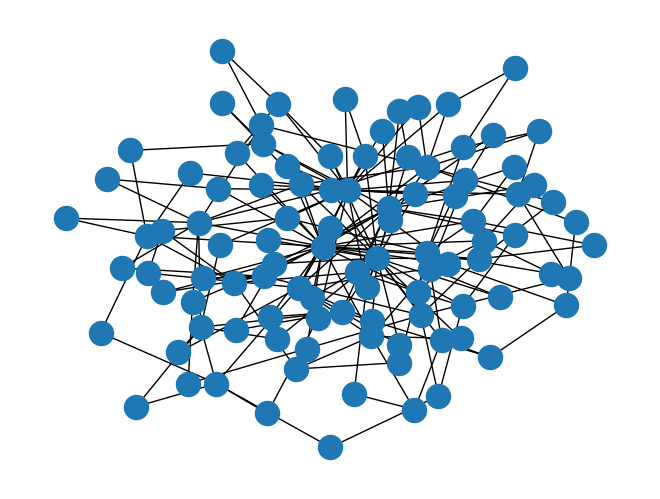

In [5]:
nx.draw_spring(G)

Frequentemente vamos querer saber algumas informações sobre o nosso grafo. Por exemplo, aqui temos um histograma que mostra o grau dos vértices presentes no grafo criado.

(array([79., 11.,  3.,  2.,  1.,  1.,  0.,  0.,  1.,  2.]),
 array([ 2. ,  4.2,  6.4,  8.6, 10.8, 13. , 15.2, 17.4, 19.6, 21.8, 24. ]),
 <BarContainer object of 10 artists>)

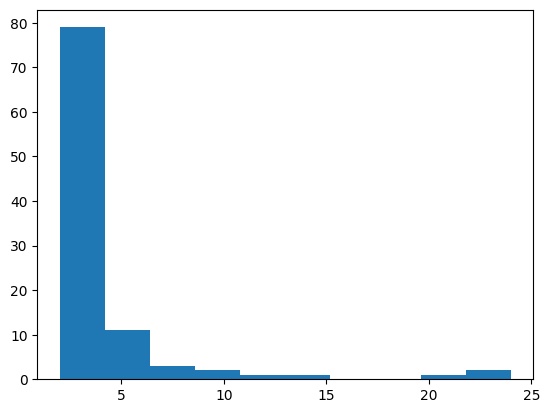

In [6]:
import matplotlib.pyplot as plt

plt.hist([v for k, v in nx.degree(G)])

Para se aprofundar mais sobre as funcionalidades desta biblioteca, algumas fontes recomendadas para estudo são:

- [Introduction to NetworkX in Python](https://www.youtube.com/watch?v=flwcAf1_1RU)
- [NetworkX.org](https://networkx.org/documentation/stable/reference/index.html)

# Resolvendo com o NetworkX

Porém, ao invés de nós mesmos definirmos um objeto Grafo manualmente, a linguagem Python já conta com uma biblioteca com o objeto de grafo já criado de antemão em com várias funções e métodos voltadas para a criação de grafos e resolução de problemas com algoritmos em grafos: o [NetworkX](https://networkx.org/documentation/stable/reference/introduction.html).

O NetworkX, combinado com o [Matplotlib](https://matplotlib.org/stable/tutorials/introductory/index.html), permite ainda a criação e exibição de imagens de grafos, facilitando a visualização do problema a ser lidado e o seu resultado após a sua resolução.

E o NetworkX, por exemplo, já conta com a função [`minimal_spanning_tree()`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.tree.mst.minimum_spanning_tree.html#networkx.algorithms.tree.mst.minimum_spanning_tree) para executar o algoritmo de Prim ou de Kruskal e encontrar a AGM dentro de um grafo. Para isso, é necessário construir o grafo do problema antes de executar o algoritmo.

## Resolvendo o problema

In [7]:
# Importando a biblioteca NetworkX e apelidando-a de 'nx'
import networkx as nx

# Instanciando um grafo não direcionado
G = nx.Graph()

# Criando os nós a partir de uma lista
# Foi criado um atributo chamado 'cidade' para cada um dos nós
G.add_nodes_from([
    ( 1, {'cidade': 'Torina'   }),
    ( 2, {'cidade': 'Milano'   }),
    ( 3, {'cidade': 'Bolzano'  }),
    ( 4, {'cidade': 'Verona'   }),
    ( 5, {'cidade': 'Venezia'  }),
    ( 6, {'cidade': 'Trieste'  }),
    ( 7, {'cidade': 'Genova'   }),
    ( 8, {'cidade': 'Bolgano'  }),
    ( 9, {'cidade': 'Ancona'   }),
    (10, {'cidade': 'Pisa'     }),
    (11, {'cidade': 'Firenze'  }),
    (12, {'cidade': 'Roma'     }),
    (13, {'cidade': 'Peragia'  }),
    (14, {'cidade': 'Caligiari'}),
    (15, {'cidade': 'Napoli'   }),
    (16, {'cidade': 'Pesacara' }),
    (17, {'cidade': 'Palermo'  }),
    (18, {'cidade': 'Catamin'  }),
    (19, {'cidade': 'Potenza'  }),
    (20, {'cidade': 'Catanzaro'}),
    (21, {'cidade': 'Bari'     })
])

# Criando as arestas a partir de uma lista
# Foi criado um atributo 'distância' para cada uma das arestas
G.add_edges_from([
    ( 1,  2, {'distância':  95}),
    ( 1,  7, {'distância':  90}),
    ( 2,  3, {'distância': 140}),
    ( 2,  4, {'distância': 110}),
    ( 2,  7, {'distância':  90}),
    ( 3,  4, {'distância': 110}),
    ( 3,  6, {'distância': 210}),
    ( 4,  5, {'distância':  90}),
    ( 4,  8, {'distância':  95}),
    ( 5,  6, {'distância':  85}),
    ( 5,  8, {'distância':  95}),
    ( 7,  8, {'distância': 130}),
    ( 7, 10, {'distância': 120}),
    ( 7, 11, {'distância': 150}),
    ( 8,  9, {'distância': 200}),
    ( 8, 11, {'distância':  55}),
    ( 9, 16, {'distância': 130}),
    (10, 11, {'distância':  60}),
    (10, 12, {'distância': 190}),
    (11, 12, {'distância': 180}),
    (11, 13, {'distância': 110}),
    (12, 13, {'distância': 120}),
    (12, 14, {'distância': 480}),
    (12, 15, {'distância': 180}),
    (13, 16, {'distância': 170}),
    (14, 17, {'distância': 420}),
    (15, 16, {'distância': 200}),
    (15, 17, {'distância': 310}),
    (15, 18, {'distância': 350}),
    (15, 19, {'distância':  90}),
    (15, 21, {'distância': 210}),
    (16, 21, {'distância': 270}),
    (17, 18, {'distância': 150}),
    (18, 20, {'distância': 210}),
    (19, 20, {'distância': 200}),
    (19, 21, {'distância': 100})
])

# Gera a Árvore Geradora Mínima
AGM = nx.minimum_spanning_tree(
    G,                  # Grafo original
    weight='distância', # Peso das arestas definido como sendo as distâncias
    algorithm='prim'    # Definindo o algoritmo ultilizado como sendo Prim
    )

print(AGM) # Exibe o número de nós e arestas da AGM

Graph with 21 nodes and 20 edges


## Desenhando os grafos

Para desenhar um grafo, antes de tudo, é necessário criar e guardar as posições dos nós em uma variável. É possível fazer isso manualmente (o que é bem trabalhoso!) ou usar uma função do tipo `_layout()`, já disponível no NetworkX, para fazer isso automaticamente por nós (Ainda bem!). Para isso, usou-se a função [`kamada_kawai_layout()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.kamada_kawai_layout.html) e, logo depois, utilizou-se [`draw_networkx()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx) para desenhar os grafos.

Text(0.5, 1.0, 'Árvore Geradora Mínima')

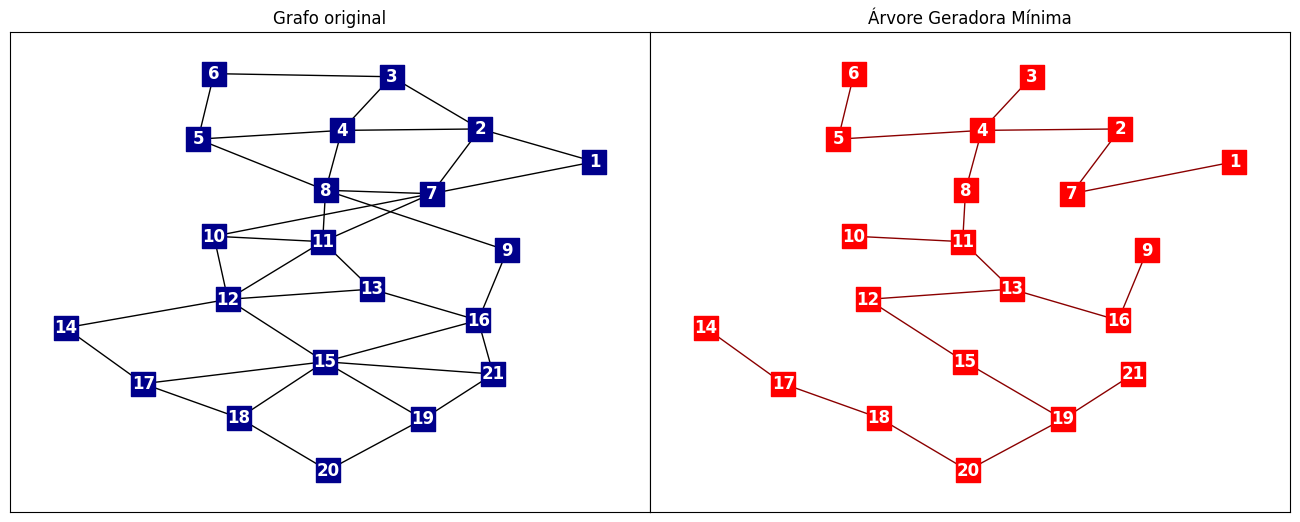

In [10]:
import matplotlib.pyplot as plt

# Define o layout dos pontos para exibição
posicao = nx.kamada_kawai_layout(G)

# Desenha o grafo original
nx.draw_networkx(
    G,                       # Grafo original
    ax= plt.axes([0,0,1,1]), # Define o eixo de exibição
    pos= posicao,            # Define o layout dos nós         
    with_labels= True,       # Os nós terão rótulos para exibir os seus nomes
    node_color= 'darkblue',  # Define a cor dos nós como azul escuro
    node_size= 300,          # Define o tamanho dos nós
    node_shape= 's',         # Define o formato dos nós como sendo quadrados (square)
    font_weight= 'bold',     # Coloca negrito no texto dos nomes dos nós
    font_color= 'white'      # Define a cor do texto dos nomes como branco
    )
plt.title('Grafo original')

# Desenha a AGM
nx.draw_networkx(
    AGM,                     # Árvore Geradora Mínima
    ax= plt.axes([1,0,1,1]), # Define o eixo de exibição
    pos= posicao,            # Define o layout dos nós         
    with_labels= True,       # Os nós terão rótulos para exibir os seus nomes
    node_color= 'red',       # Define a cor dos nós como vermelho
    edge_color= 'darkred',   # Define a cor das arestas como vermelho escuro
    node_size= 300,          # Define o tamanho dos nós
    node_shape= 's',         # Define o formato dos nós como quadrado
    font_weight= 'bold',     # Coloca negrito no texto dos nomes dos nós
    font_color= 'white'      # Define a cor do texto dos nomes como branco
    )

plt.title("Árvore Geradora Mínima")

# Exercício

Utilizando o que foi aprendido nesta aula, resolva o seguinte problema com o NetworkX, exibindo ao final o grafo original e o grafo da solução encontrada com o auxílio do Matplotlib, fazendo, destarte, uma comparação lado a lado dos dois grafos.

> No transporte intermodal, os caminhões carregados são embarcados entre os terminais ferroviários em carretas especiais. A figura a abaixo mostra a localização dos principais terminais ferroviários nos Estados Unidos e as ferrovias existentes. O objetivo é decidir quais vias devem ser “revitalizadas” para atender o tráfego intermodal. Em particular, o terminal de Los Angeles (LA) deve ser conectado diretamente a Chicago (CH) para acomodar o tráfego pesado esperado. Fora isso, todos os terminais restantes podem ser interligados, direta ou indiretamente, de forma que o comprimento total (em milhas) das pistas selecionadas seja minimizado. Determine os trechos de trilhos que devem ser incluídos no programa de revitalização.

<center>

![exercicio_AGM.png](../assets/exercicio_agm.png)

Fonte: TAHA, Hamdy A. **Operations Research: An Introduction**. 10ª edição. Exercício 6-9, pág. 290.

</center>

### (a) Resolva com NetworkX

In [ ]:
import networkx as nx



### (b) Plote os grafos (o original e a solução) com Matplotlib

In [ ]:
import matplotlib.pyplot as plt

